In [2]:
import pandas as pd    #load the data, statistics
import seaborn as sns   #visualize the data

train_df = pd.read_csv('input/train.csv')


#train_df.iloc[889:891]
#train_df.head()
print(train_df[train_df['Age'] > 60])

     PassengerId  Survived  Pclass                                       Name  \
33            34         0       2                      Wheadon, Mr. Edward H   
54            55         0       1             Ostby, Mr. Engelhart Cornelius   
96            97         0       1                  Goldschmidt, Mr. George B   
116          117         0       3                       Connors, Mr. Patrick   
170          171         0       1                  Van der hoef, Mr. Wyckoff   
252          253         0       1                  Stead, Mr. William Thomas   
275          276         1       1          Andrews, Miss. Kornelia Theodosia   
280          281         0       3                           Duane, Mr. Frank   
326          327         0       3                  Nysveen, Mr. Johan Hansen   
438          439         0       1                          Fortune, Mr. Mark   
456          457         0       1                  Millet, Mr. Francis Davis   
483          484         1  

In [4]:
survived_counts = train_df['Survived'].value_counts()
print(survived_counts)

pclass_counts = train_df['Pclass'].value_counts()
print(pclass_counts)

Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


<Axes: xlabel='Sex', ylabel='Survived'>

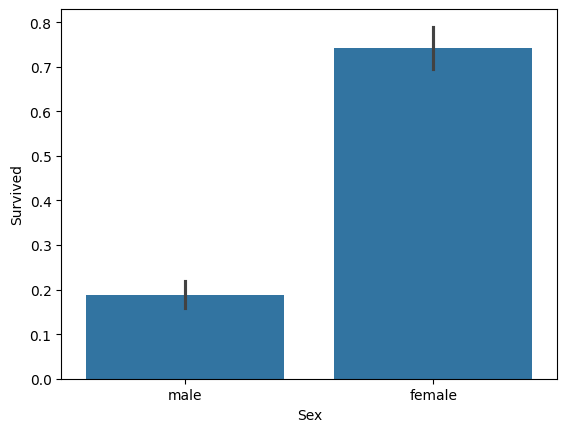

In [17]:
sns.barplot(x='Sex', y='Survived', data=train_df)
#sex is a feature

/var/folders/sr/hz_b0b051sz3mhqpmpz4jy9m0000gn/T/ipykernel_78906/647054621.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = train_df.groupby(age_groups).size()


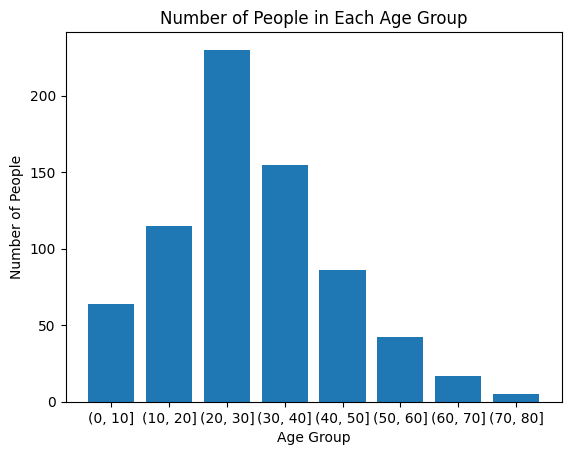

In [ ]:
import matplotlib.pyplot as plt

# Define the age groups
age_groups = pd.cut(train_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

# Count the number of people in each age group
age_group_counts = train_df.groupby(age_groups).size()

# Plot the bar chart
plt.bar(age_group_counts.index.astype(str), age_group_counts.values)


# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.title('Number of People in Each Age Group')

# Display the plot
plt.show()
# Calculate the survival rate of each age group

/var/folders/sr/hz_b0b051sz3mhqpmpz4jy9m0000gn/T/ipykernel_78906/2435848276.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = train_df.groupby(age_groups)['Survived'].mean()


<BarContainer object of 8 artists>

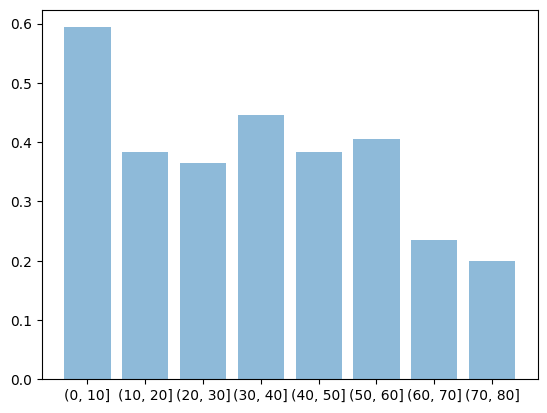

In [22]:
import matplotlib.pyplot as plt
age_groups = pd.cut(train_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
survival_rate = train_df.groupby(age_groups)['Survived'].mean()

plt.bar(survival_rate.index.astype(str), survival_rate.values, alpha=0.5)


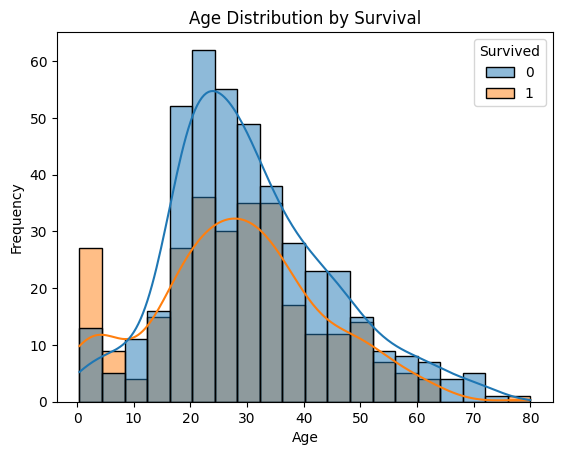

In [25]:
sns.histplot(data=train_df, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#make new category, under 8, as a feature, potentially also over 60

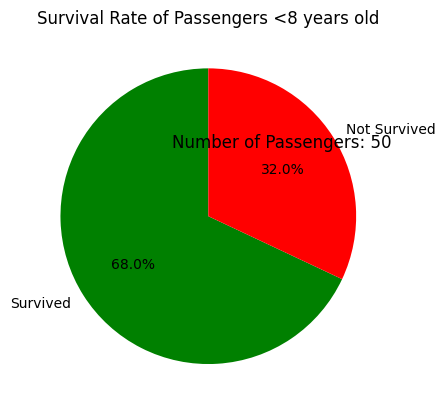

In [29]:
import matplotlib.pyplot as plt

# Filter the dataframe to include only passengers whose 'Age' is <8
young_passengers = train_df[train_df['Age'] < 7]

# Count the number of survivors and non-survivors among the young passengers
survived_count = young_passengers[young_passengers['Survived'] == 1].shape[0]
not_survived_count = young_passengers[young_passengers['Survived'] == 0].shape[0]

# Create a pie chart
labels = ['Survived', 'Not Survived']
sizes = [survived_count, not_survived_count]
colors = ['green', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
# Count the number of passengers in the young_passengers dataframe
num_passengers = len(young_passengers)
# Display the number of passengers
plt.text(0.5, 0.5, f"Number of Passengers: {num_passengers}", ha='center', va='center', fontsize=12)

# Add a title
plt.title('Survival Rate of Passengers <7 years old')

# Display the pie chart
plt.show()

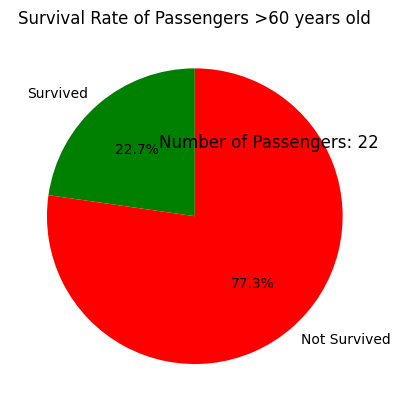

In [51]:
import matplotlib.pyplot as plt

# Filter the dataframe to include only passengers whose 'Age' is <8
old_passengers = train_df[train_df['Age'] > 60]

# Count the number of survivors and non-survivors among the young passengers
survived_count = old_passengers[old_passengers['Survived'] == 1].shape[0]
not_survived_count = old_passengers[old_passengers['Survived'] == 0].shape[0]

# Create a pie chart
labels = ['Survived', 'Not Survived']
sizes = [survived_count, not_survived_count]
colors = ['green', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
num_passengers = len(old_passengers)
# Display the number of passengers
plt.text(0.5, 0.5, f"Number of Passengers: {num_passengers}", ha='center', va='center', fontsize=12)

# Add a title
plt.title('Survival Rate of Passengers >60 years old')

# Display the pie chart
plt.show()

<Axes: xlabel='Pclass', ylabel='Survived'>

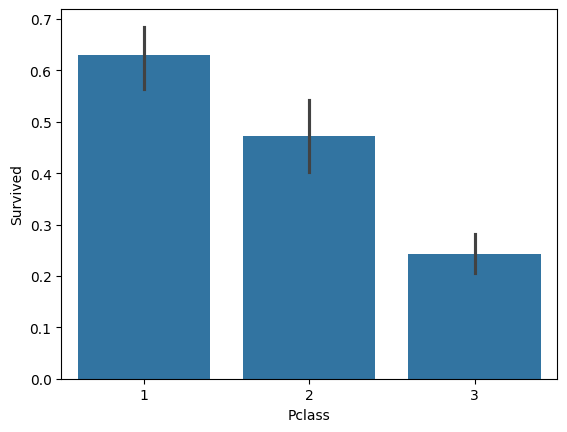

In [11]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
#Pclass is a feature

<Axes: xlabel='Embarked', ylabel='Survived'>

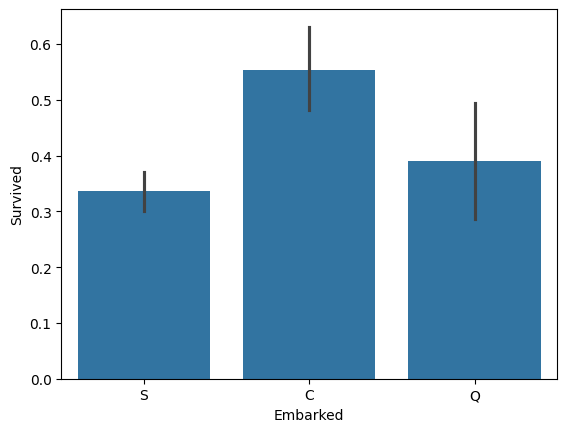

In [12]:
sns.barplot(x='Embarked', y='Survived', data=train_df)
#not a feature

<Axes: xlabel='SibSp', ylabel='Survived'>

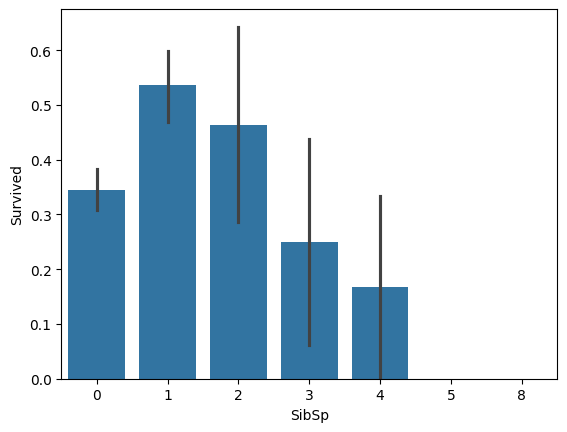

In [53]:
sns.barplot(x='SibSp', y='Survived', data=train_df)
#not a feature

<Axes: xlabel='Parch', ylabel='Survived'>

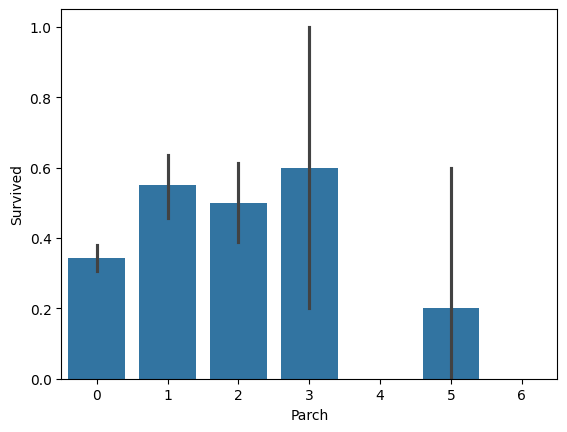

In [35]:
sns.barplot(x='Parch', y='Survived', data=train_df)
#not a feature

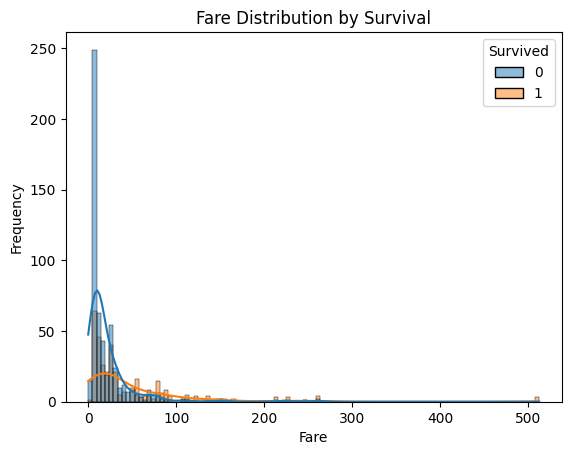

In [52]:
sns.histplot(data=train_df, x='Fare', hue='Survived', kde=True)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()
#seems to be more determined by pclass than fare

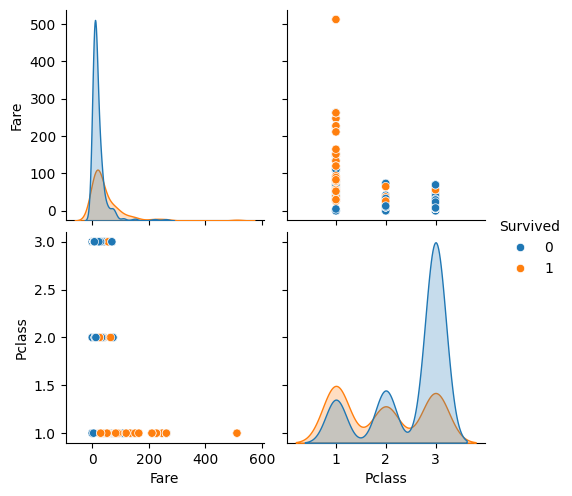

In [29]:
sns.pairplot(train_df, vars=['Fare', 'Pclass'], hue='Survived')
plt.show()

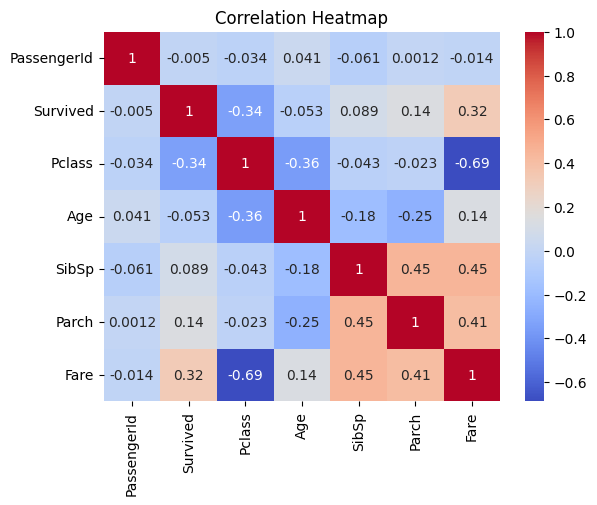

In [38]:
numerical_features = train_df.select_dtypes(include=['float64', 'int64'])

#corr = numerical_features.corr()

#spearman correlation
corr = numerical_features.corr(method='spearman')

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Embarked', ylabel='count'>

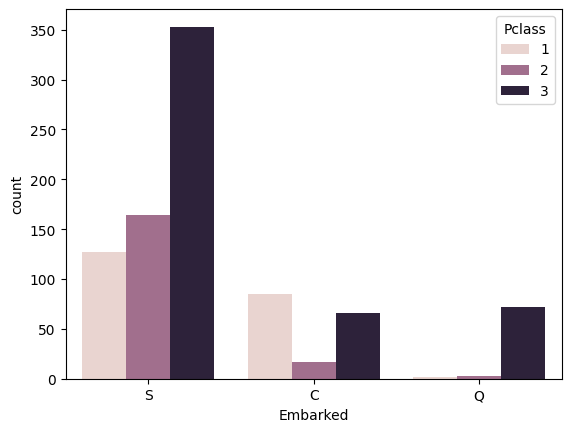

In [39]:
sns.countplot(x='Embarked', hue='Pclass', data=train_df)
#big variability of passengers from each location, C has biggest ratio of first class, rule out Embarked as a feature

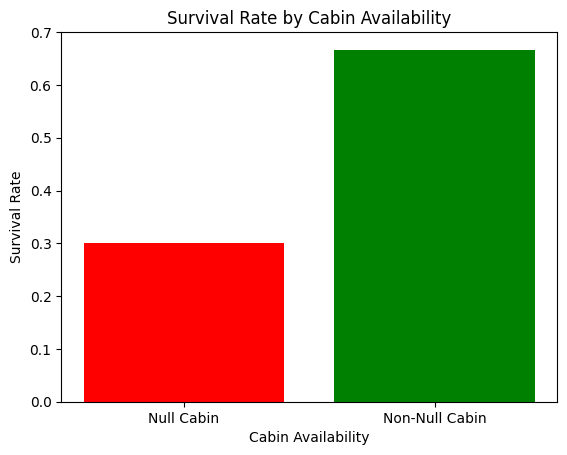

In [65]:
cabin_null = train_df[train_df['Cabin'].isnull()]
cabin_not_null = train_df[train_df['Cabin'].notnull()]

# Calculate the survival rate for passengers with null cabin values
null_cabin_survival_rate = cabin_null['Survived'].mean()

# Calculate the survival rate for passengers with non-null cabin values
not_null_cabin_survival_rate = cabin_not_null['Survived'].mean()

# Create a bar plot to compare the survival rates
labels = ['Null Cabin', 'Non-Null Cabin']
survival_rates = [null_cabin_survival_rate, not_null_cabin_survival_rate]
colors = ['red', 'green']

plt.bar(labels, survival_rates, color=colors)
plt.xlabel('Cabin Availability')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Cabin Availability')

plt.show()
#can be attributed to non null cabin values generally corresponding to a higher p class

/var/folders/sr/hz_b0b051sz3mhqpmpz4jy9m0000gn/T/ipykernel_84501/156153046.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cabin_not_null['Cabin_First_Letter'] = cabin_first_letter


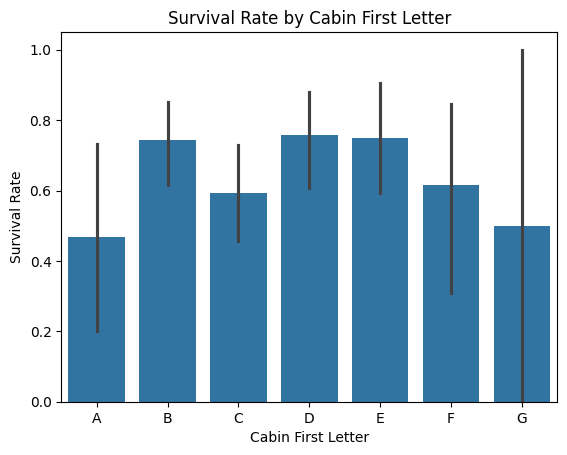

In [55]:
# Filter the dataframe to include only rows where 'Cabin' is not null
cabin_not_null = train_df[train_df['Cabin'].notnull()]

# Extract the first letter of the 'Cabin' column
cabin_first_letter = cabin_not_null['Cabin'].str[0]

# Create a new column 'Cabin_First_Letter' in the dataframe
cabin_not_null['Cabin_First_Letter'] = cabin_first_letter

# Plot the comparison using seaborn
sns.barplot(x='Cabin_First_Letter', y='Survived', data=cabin_not_null, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# Add labels and title
plt.xlabel('Cabin First Letter')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Cabin First Letter')

# Display the plot
plt.show()

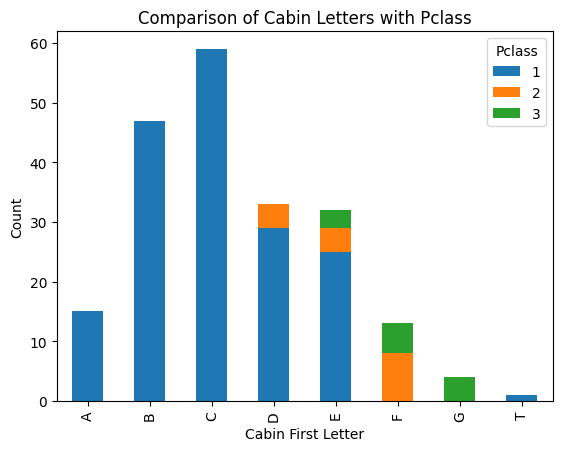

In [56]:
cabin_pclass_comparison = cabin_not_null.groupby(['Cabin_First_Letter', 'Pclass']).size().unstack()

cabin_pclass_comparison.plot(kind='bar', stacked=True)

plt.xlabel('Cabin First Letter')
plt.ylabel('Count')
plt.title('Comparison of Cabin Letters with Pclass')

plt.show()